# 1. Использование готового репозитория YOLO v5

Чаще всего код уже реализован. В этом случае всегда предпочтительно запускать готовый код от создателей моделей. 

В нашем случае мы будем работать с детектором YOLO v5, который выложен создателями в открытый доступ. Поэтому мы возьмем этот код и попробуем его запустить. 

В реальных проектах именно с этого рекомендуется начинать работу: поискать в сети уже реализованные решения и попробовать запустить.

## 1.1 Установим библиотеки и смонтируем данные

Для начала поставим PyTorch, Tensorboard, OpenCV с помощью терминальной команды pip. Терминальные команды можно использовать в Jupyter Notebook-ах и Colab-е. Для того, чтобы запустить терминальную команду, необходимо перед командой поставить восклицательный знак.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r -q /content/yolov5/requirements.txt
# !pip install -q tensorboard opencv-python roboflow gitpython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1.2. Подготовка данных для YOLO v5

### !! Необходимо действие

Добавьте в ваш Google Drive в папку ```'Datasets'```, находящуюся в корне диска, [ссылку на данные](https://drive.google.com/drive/folders/1aEVxvGXa5tsjhycH2AKV-lgiLUiFeMPs?usp=share_link), которые мы будем использовать для обучения YOLO v5.

Для добавления ссылку на эти данные, необходимо перейти по ссылке под аккаунтом, который вы используете для Colab Pro+

По этой ссылке вы можете найти архив, разбитый на части, внутри которого лежат структурированные данные



---

WARNING!!!

Если вы добавите данные в какую-то другую папку, имейте в виду, что нужно будет поменять путь в тех местах, где это может потребоваться


<img src='https://drive.google.com/uc?id=1Rj-xG0u3oteuDRQv2Qj-UO3Pc0Ywmji8' width='512' alt='How to Add the Dataset'>

In [ ]:
# !rm -rf sample_data
!rm -rf dataset_u1
!mkdir dataset_u1
!7z x -o/content/dataset_u1/ -y -bsp2 "/content/drive/MyDrive/Datasets/VA_2_Detection/" 

Посмотрим, как выглядят обучающие примеры и разметка для них. 

Напомним, что это всегда нужно делать до начала обучения.

Внимательно посмотрите на код, приведенный ниже и убедитесь, что понимаете, в каком формате хранится разметка для изображений.

In [ ]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches

prefix = 'dataset_u1'

train = sorted(os.listdir(os.path.join(prefix, 'train/images')))
valid = sorted(os.listdir(os.path.join(prefix, 'valid/images')))

images = [mpimg.imread(os.path.join(prefix, f'train/images/{i}')) for i in train[:10]]
labels = []
print('Число примеров в тренировочном и валидационном датасетах:', len(train), len(valid))

for item in train[:5]:
    with open(os.path.join(prefix, f'train/labels/{item[:-4]}.txt'), 'r') as f:
        lines = [line.strip() for line in f]
        labels.append(lines)

        
for item, boxes in zip(images, labels):
    fig, ax = plt.subplots()
    ax.imshow(item)
    for box in boxes:
        items = box.split(' ')
        rect = patches.Rectangle((((float(items[1]) * item.shape[1]) - ((float(items[3]) * item.shape[1]) / 2)),((float(items[2]) * (item.shape[0])) - ((float(items[4]) * item.shape[0]) / 2))),float(items[3]) * item.shape[1], float(items[4]) * item.shape[0], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

## 1.3. Tensorboard

Tensorboard - это стандартный способ отслеживать процесс обучения. В TensorBoard можно строить графики метрик и лосс-функций, отрисовывать картинки и отслеживать, как они со временем меняются. YOLO v5 автоматически пишет логи в TensorBoard.

Мы будем использовать TensorBoard как для обучения YOLO, так и для обучения нашей сети.

In [ ]:
#@title Запуск TensorBoard

%load_ext tensorboard
%tensorboard --logdir yolov5

## 1.5. Обучение YOLO v5

Запустим процесс обучения на 30 эпох, после чего будем брать лучшие веса(best.pt) из "runs/train" и повторять обучение на них, пока не достигнем удовлетворительных результатов. 

### Задача 1: обучение YOLOv5 из репозитория

Изучите содержимое репозитория YOLOv5. Найдите скрипты для обучения модели, валидации и применения детектора (инфиренса).

Изучите параметры скрипта обучения. Обычно посмотреть параметры и их описание можно, вызвав функцию ```%run path/to/script --help```.

Проверьте, что обучение работает. Для этого проведите обучение со следующими параметрами:

* Размер изображения -- 640
* Размер батча -- 32
* Количество эпох -- 1
* Индекс данных YAML -- найдите соответствующий файл в распакованном датасете
* Файл для весов -- ./yolov5.pth
* Seed для генератора случайных чисел -- 42

После того, как одна эпоха будет пройдена, вы сможете посмотреть на процесс обучения нейронной сети в tensorboard. Для этого нужно обновить отчет (в правом верхнем углу).

In [ ]:
# !python #YOUR CODE HERE

In [ ]:
## UNIT TEST FOR 1 epoch

import torch

os.chdir('/content/yolov5')
res = torch.load('/content/yolov5/runs/train/exp/weights/best.pt', map_location='cpu')
os.chdir('/content')

res = res['model']
res = torch.nn.utils.parameters_to_vector(res.parameters())

correct = torch.tensor([-0.00541, -0.01634,  0.00120,  0.01668, -0.01585,  0.00966, -0.01685, -0.02988,  0.01142,  0.01114], dtype=torch.float16)
assert ((res[:10] - correct).abs().mean() < 1.0e-4)

print("OK")

print(res.shape)

## 1.5* Задача 2: обучение YOLOv5

Если вы завели обучение нейронной сети на одной эпохе, то это же обучение может идти и 10 и 1000 эпох вполне успешно 

```! исключения составляют те случаи, когда в математике нейронной сети допущены ошибки, и со временем веса сети "взрываются").```

Поэтому для того, чтобы обучить нейронную сеть "по-серьезному", достаточно просто увеличить число эпох на обучении.

Поставьте 50 эпох и запустите обучение. Посмотрите на процесс обучения, имеет ли смысл продолжать обучение дольше, чем 50 эпох

In [ ]:
## YOUR CODE HERE

Скачайте полный датасет для домашнего задания (13.5 тыс изображений) на https://disk.yandex.ru/d/acMbta8_jBafrg. 
Вам нужно будет обучить модель на полном датасете и сравнить по метрикам качества (precision, recall, mAP_0.5, mAP_0.5:0.95) с моделью, полученной при обучении на урезанном датасете. Пример модели, полученной на полном датасете: best_fullds.pt


## 1.6. Применение нейронной сети

### 1.6.1. Задача 3: скрипт инфиренса



Найдите скрипт, который осуществляет детекцию объектов. Изучите его аргументы. Запустите этот скрипт на валидационных изображениях из нашего датасета (аргумент ```--source```). Используйте **лучшие** веса из всего процесса обучения (аргумент ```--weights```).

По умолчанию артефакты обучения складываются в папку ```yolov5/runs/train/exp<N>```

После завершения процедуры, визуализируйте результаты работы по аналогии с тем, как были визуализирован датасет выше.



In [ ]:
# !python3 ## YOUR CODE HERE

In [ ]:
# res_dir = 'yolov5/runs/detect/exp'

# for imgname in list(sorted(os.listdir(res_dir)))[:10]:
    # plt.figure()
    # plt.imshow(mpimg.imread(os.path.join(res_dir, imgname)))

## 1.7. Сравнение обучения моделей на урезанном и полном датасетах

### 1.7.1. Количество эпох, графики, метрики

#### Задача 4: оценка качества модели

В пакете YOLO v5 имеется скрипт для оценки качества модели (```val.py```). Изучите параметры скрипта и запустите валидацию лучшей модели из всего обучения на тренировочных данных.

In [ ]:
# YOUR CODE HERE

### 1.7.2. Затраты времени на обучение модели

NVIDIA GeForce GTX 1080 Ti

Затраты времени на обучение в течение 30 эпох на полном датасете - 16,5 часов.

# 2. Реализация обучения архитектуры для детекции

Приведенное выше – то, с чего стоит начать изучение новой задачи: стоит найти релевантные репозитории и внимательно их изучить, как работают имеющиеся решения. 

Если ваша задача сделать Proof-of-Concept, то ваша задача – как можно быстрее добежать до результата. В этом случае стоит ограничиться только изучением имеющихся репозиториев, а этап исследований отложить на потом.

Если же в какой-то момент необходимо сделать собственное решение, то необходимо будет написать собственный пайплайн обучения. Для продуктов для задачи детекции это достаточно редкое явление. Но мы рассмотрим, как написать такой пайплайн для задачи детекции в учебных целях.

Прежде, чем продолжать, установим ```pytorch lightning```

In [ ]:
!pip install -q pytorch-lightning==1.9.3

## 2.1. Датасеты

Так же, как и ранее, добавьте [ссылку на данные](https://drive.google.com/drive/folders/12-WOxjHbUkdEdWl7Tlhrj2lfbYhtznda?usp=share_link) для обучения в свой Google Drive в папку ```Datasets```.

В качестве датасета будем использовать тот же датасет, что и в 1м разделе ноутбука

### 2.1.1 Задача 5: сделайте класс датасета

Мы начнём решение задачи с написания датасета для задачи детекции. Датасет выполняет следующие задачи:

1. Хранит информацию (индекс) о датасете
    * о количестве изображений
    * о том, где какое изображение находится
    * о том, где и в каком формате хранится разметка для изображения
2. По запросу загружает изображение с разметкой в формате целевых тензоров

#### Подзадача: подготовьте аугментации

Подготовьте словарь или структуру ```transforms```, в которой будут храниться агументации для валидации и тренировки. Аугментации будем применять, доступные в библиотеке ```albumentations```. Аугментации объединяйте при помощи класса ```Compose```.

На стадии тренировки нам важно, чтобы из обучающих примеров мы могли составить батчи. Для этого нам нужно, чтобы и тензоры входных сигналов (изображения), и целевые тензоры были одинакового размера.

Поэтому для ```'train'``` предлагается использовать для начала следующие агументации: `CenterCrop 512, Noramlize, ToTensorV2`.

После того, как проверите, что датасет работает так, как нужно, замените ```CenterCrop``` на ```RandomResizedCrop```, чтобы иметь возможность обучать вашу сеть на разнообразных кусочках изображения.

Хорошая практика -- делать валидацию в максимально сценарии, который максимально похож на тренировочный. Это нужно для того, чтобы отлавливать проблему перетренированности. Кроме того, удобно на валидацию навешивать Schedulers для уменьшения скорости обучения. Поэтому сделайте аугментации ```'valid'``` точно такими же, как и для тренировки.

Для тестирования у нас есть отдельные данные. На этих данных хотелось бы отслеживать целевую метрику. Она должна быть не рандомизированной, поэтому на тестовых данных исключаются рандомизированные аугментации. Кроме того, для тестирования уже нет необходимости укладывать данные в батчи. Да, на батчах тестирование будет выполняться быстрее, но это не принципиально. Поэтому нам нужно только позаботиться о том, чтобы изображение делилось нацело на 32 (это очень частое требование, которое связано с присутствием MaxPooling в архитектуре).

Для ```'test'``` используйте следующие аугментации: ```SmallestMaxSize 512, PadIfNeeded /32, Normalize, ToTensorV2```.

Мы будем использовать bbox-ы в формате ```Pascal VOC```, поэтому в Compose выставьте параметр bbox_params равным словарю с полями: ```'format': 'pascal_voc', 'label_fields': ['labels']```. Второе свойство означает, что метки классов мы будем хранить по ключу ```'labels'```.

In [ ]:
import albumentations as A
import cv2
from albumentations.pytorch.transforms import ToTensorV2

transforms = {
    'train': None, ## YOUR CODE HERE
    'valid': None, ## YOUR CODE HERE,
    'test':  None  ##YOUR CODE HERE
}

#### Подзадача: реализуйте класс датасета

Подготовьте класс ```DetectionDataset```.

В нем уже готовы 2 из 3х методов, Вам необходимо сделать только метод ```__getitem__(self, idx)```. В нем нужно сделать следующее:

* загрузить изображение (используйте ```PIL.Image```)
* загрузить соответствующую разметку
* подготовить список bounding box-ов, каждый из которых должен быть представлен в виде списка ```[x_min, y_min, x_max, y_max]```, обратите внимание, что ```x_min < x_max, y_min < y_max```
* подготовьте список лейблов для каждого из bounding box-ов
* примените агументации к изображению и набору bounding box-ов
* создайте для автомобилей и номеров по заготовке целевого тензора из нулей. Размер тензора: ```5 x H/cell x W/cell```, где 5 - это число предсказываемых значений (индикатор наличия, смещение по X, смещение по Y, логарифм высоты, логарифм ширины), ```cell``` - размер ячейки (в нашем случае 8)
* в тех ячейках тензора автомобилей, куда попадает центр автомобиля, задайте целевые значения: ```[1, x_shift/cell, y_shift/cell, log(width), log(height)]```
* то же самое проделайте с автомобильными номерами
* верните изображение (shape должен быть ```3 x H x W```) и целевой тензор (shape должен быть ```10 x H/cell x W/cell```)


In [ ]:
from torch.utils.data import DataLoader, Dataset
import glob
import cv2
import numpy as np
import xml.etree.ElementTree as et
import torch
from PIL import Image
from scipy.ndimage import gaussian_filter


class DetectionDataset(Dataset):
    def __init__(self, 
                 dir_path,  
                 classes,
                 transforms=None,
                 cell=8):
        
        self.transforms = transforms
        self.dir_path = dir_path
        self.classes = classes
        self.cell = cell
        
        # получение путей всех изображений в отсортированном порядке
        self.image_paths = glob.glob(f"{self.dir_path}/images/*.jpg")

        # получение только названий файлов в отсортированном порядке
        self.all_images = [image_path.split(os.path.sep)[-1] for image_path in self.image_paths]
        self.all_images = sorted(self.all_images)

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        ## YOUR CODE HERE
                    
        return {'img': image,
                'targ': torch.cat([car_target, plate_target], dim=0)}

### 2.1.2. Инициализация датасетов

In [ ]:
import yaml

stream = open("/content/dataset_u1/data.yaml", "r")
config = yaml.safe_load(stream)

train_ds = DetectionDataset(
    '/content/dataset_u1/train/',
    classes=config['names'],
    transforms=transforms['train']
)

test_ds = DetectionDataset(
    '/content/dataset_u1/valid/',
    classes=config['names'],
    transforms=transforms['valid']
)

### 2.1.3. Декодирование предсказаний сети (и таргетов датасета), тестирование датасета

Функция, которая представлена ниже, делает операцию, обратную к тому, что мы делали в датасете, чтобы сформировать целевые тензоры: смотрит на карты присутствия, и в тех ячейках, где вероятность объекта превышает порог, вычисляет смещение и габариты объекта. Найденные bounding boxes, метки и вероятности складываются в списки.

In [ ]:
print(len(train_ds))
import numpy
import torchvision

def decode_result(datum, threshold=1.0, r=8, iou_threshold=0.7):
    bboxes = {'boxes': [], 'scores': [], 'labels': []}
    datum = {0: datum[:5, :, :], 
             1: datum[5:, :, :]}

    for label in [0, 1]:
        mask = (datum[label][0, :, :] >= threshold)

        x_cell = torch.arange(mask.shape[1], device=datum[label].device)
        y_cell = torch.arange(mask.shape[0], device=datum[label].device)

        y_cell, x_cell = torch.meshgrid(y_cell, x_cell)

        x_cell = x_cell[mask]
        y_cell = y_cell[mask]
        
        x_shift = datum[label][2, :, :][mask]
        y_shift = datum[label][1, :, :][mask]

        x = (x_cell + x_shift) * r
        y = (y_cell + y_shift) * r

        w = datum[label][4, :, :][mask].exp() * r
        h = datum[label][3, :, :][mask].exp() * r

        scores = datum[label][0, :, :][mask]


        for index in range(len(x)):
            bboxes['boxes'].append([x[index] - w[index]/2, 
                         y[index] - h[index]/2, 
                         x[index] + w[index]/2, 
                         y[index] + h[index]/2])
            bboxes['scores'].append(scores[index])
            bboxes['labels'].append(label)

    bboxes['boxes'] = torch.tensor(bboxes['boxes']).reshape([-1, 4])
    bboxes['scores'] = torch.tensor(bboxes['scores'])
    bboxes['labels'] = torch.tensor(bboxes['labels'])

    to_keep = torchvision.ops.nms(bboxes['boxes'], bboxes['scores'], iou_threshold=iou_threshold)

    bboxes['boxes'] = bboxes['boxes'][to_keep]
    bboxes['scores'] = bboxes['scores'][to_keep]
    bboxes['labels'] = bboxes['labels'][to_keep]

    return bboxes


def decode_batch(batch, threshold=0.5, iou_threshold=0.3):
    res = []
    for index in range(batch.shape[0]):
        res.append(decode_result(batch[index], 
                   threshold=threshold, 
                   iou_threshold=iou_threshold))
    return res


### 2.1.4. Отрисовка таргетов


In [ ]:
def draw_box(coords, label):
    # print(coords)
    # print(label)
    # return None
    x = numpy.array((coords[0], coords[2]))
    y = numpy.array((coords[1], coords[3]))
    color = 'g'
    if label == 0:
        color = 'r'

    plt.plot(x.mean(), y.mean(), '*' + color)

    plt.plot([x[0], x[0]], [y[0], y[1]], color)
    plt.plot([x[1], x[1]], [y[0], y[1]], color)
    plt.plot([x[0], x[1]], [y[0], y[0]], color)
    plt.plot([x[0], x[1]], [y[1], y[1]], color)
    # plt.text(x[0], y[0], label, backgroundcolor='red')
    

datum = train_ds[400]
img_min, img_max = datum['img'].min(), datum['img'].max()

print(img_min, img_max)
print(datum['img'].shape)
print(datum['targ'].shape)

bboxes = decode_result(datum['targ'])

plt.imshow((datum['img'].permute([1, 2, 0]) - img_min) / (img_max - img_min))

for index in range(len(bboxes['boxes'])):
    draw_box(bboxes['boxes'][index], bboxes['labels'][index])

Если все выполнено правильно, то ячейка выше должна выдавать следующее изображение: 

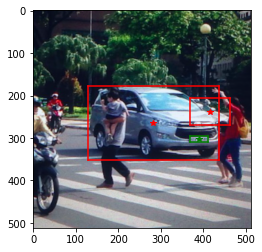

In [ ]:
plt.imshow(datum['targ'][0, :, :])

### 2.1.5. Задача 6: подготовка загрузчиков

Сконфигурируйте и инициализируйте загрузчики данных. Установите на тренировке размер батча 32.

Для тренировочных данных установите случайное перемешивание и отбрасывание последнего батча.

##### Подсказка: аргументы загрузчиков

Для тренировочного датасета выставьте:
* `batch_size` равным `32`
* `num_workers` равным `4`
* `shuffle` равным `True`
* `drop_last` равным `True`

Для тестового датасета выставьте:
* `batch_size` равным `1`
* `num_workers` равным `1`
* `shuffle` равным `False`

#### Код

In [ ]:

from torch.utils.data import DataLoader
from tqdm import tqdm

dl_train = DataLoader(
    ## YOUR CODE HERE
    )

print(len(test_ds))

dl_test = DataLoader(
    ## YOUR CODE HERE
    )

    

In [ ]:
# for datum in dl_test:

#     print(datum['img'].shape)
    

### 2.1.6. Проверка работоспособности загрузчиков

In [ ]:
print("Testing train dataloader")
for datum in tqdm(dl_train):
    pass
print("Success")

print("Testing validation dataloader")
for datum in tqdm(dl_test):
    pass
print("Success")

## 2.2. Архитектура нейронной сети

Для того, чтобы реализовать нейронную сеть, которая будет решать нашу задачу детекции, можно пойти двумя путями:

* взять уже обученный детектор и поменять в нем "голову" (или "головы", если их несколько)
* построить свой детектор ~~с блекджеком~~ без якорей на основе какой-нибудь предобученной нейронной сети

В первом случае нужно только найти головы в архитектуре и заменить их на новые, а потом полученный результат дообучить.

Во втором случае скорее всего будет необходимо выбрать некоторую архитектуру для задачи сегментации, к ней приделать модуль, который осуществляет детекцию, и далее обучить детектор. 

В нашем случае есть всего два класса, так что можно даже не волноваться по поводу якорей, а просто решить задачу при помощи двух детекторов для двух различных классов.

Скорее всего в нашем случае хорошо сработает именно первый подход, поскольку у нас очень мало данных: всего несколько тысяч изображений. Обычно в таких случаях обучать что-то достаточно глубокое -- занятие неблагодарное. Более того, очень вероятно, что будет даже лучше не дообучать всю архитектуру, а достаточно будет просто натренировать новые слои.

Но второй подход тоже стоит попробовать. Ниже будет расписан пример для реализации первого подхода.

### 2.2.1. Задача 7. Переделайте детектор Retina



Для того, чтобы сделать архитектуру нейронной сети, необходимо определить класс, унаследованный от `torch.nn.Module`, в котором должны быть определены следующие методы:

* ```__init__(self)``` -- конструктор, в котором нужно определить модули нейронной сети, которые будут использованы (так же, как в PyTorch). Кроме того, тут необходимо инициализировать классы метрик и лосс-функций. Перед объявлением модулей, необходимо вызвать ```super().__init__()``` для инициализации родительского класса, который обеспечивает основной функционал.

* ```forward(self, input)``` -- прямой проход по сети. Здесь нужно из ```input``` сделать прогнозы при помощи модулей, определенных в конструкторе (тут тоже ничего особенного, так же, как и в PyTorch).

В качестве базовой модели мы будем использовать предобученную архитектуру из библиотеки  ```torchvision```, а именно ```torchvision.models.detection.retinanet_resnet50_fpn_v2```. При этом нам понадобятся не все карты активации, которые генерирует backbone, а только одна. Нас будет интересовать карта активации, в которой максимальное количество ячеек для детекции, то есть ```[0]``` тензор результата работы backbone.

В качестве ```head``` модели предлагается определить сверточный слой. Можно сделать два последовательных сверточных слоя и посмотреть, что будет лучше обучаться.

Результат работы сети будет тензором с 10 картами активации:

* Автомобиль:
    * 0: Логит индикатора автомобиля
    * 1-2: Логиты центра автомобиля
    * 3-4: Логарифмы габаритов автомобиля
* Номер:
    * 5: Логит индикатора номера
    * 6-7: Логиты центра номера в ячейке
    * 8-9: Логарифмы габаритов номера 


#### Подсказка:

* в методе ```__init__``` 
    * инициализируйте ```self.backbone``` равным ```torchvision.models.detection.retinanet_resnet50_fpn_v2``` с весами
    * инициализируйте ```self.detector``` равным ```torch.nn.Conv2d C_IN->10 3x3```

* в методе ```forward```:
    * считайте, что ```input``` -- это батч изображений размером ```B x 3 x X x Y```
    * сделайте прямой проход (```forward```) ```self.model.backbone```
    * изучите тензоры, которые получились в результате прямого прохода
    * выберите тот тензор, пространственное разрешение которого максимально
    * посмотрите, сколько каналов в этом тензоре. Вычислите размер ячейки, это пригодится позже
    * сделайте прямой проход через ```self.detector```
    * верните результат


#### Код:

In [ ]:
import torchvision
import torch

class RetinaRehead(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## YOUR CODE HERE


    def forward(self, input):
        res = input
        ## YOUR CODE HERE
        return res

In [ ]:
model = RetinaRehead()
model.eval()
res = model.forward(torch.zeros(10, 3, 512, 1024))
print(res.shape)

## 2.3. Функции потерь

### Задача 8: Реализуйте функции потерь

Для того, чтобы реализовать функцию потерь, при помощи которой мы будем обучать модель детекции, необходимо создать отдельно 3 функции ошибки:

* ```loss_object(pred, target)```  - для отклонения по классу используем sigmoid_focal_loss
* ```loss_center(pred, target)``` - для отклонения точки центра применяем binary_cross_entropy_with_logits
* ```loss_size(pred, target)``` - для отклонений по w и h возвращаем сумму модулей отклонений.

Обычно для ошибок используется усреднение по пространственным измерениям и батчу. В нашем случае необходимо использовать суммирование. Это происходит из-за того, что функцию ошибки для центра и размера мы рассчитываем только в тех ячейках, где присутствует объект.

Помните, что лоссы для центра и габаритов рассчитываются только в тех ячейках, где соответствующие объекты присутствуют.

На вход функции потерь подаются ```pred``` и ```target```. 

На выходе должно быть значение ошибки (скаляр). 

Не забываем, что ошибка должна считаться при любом ```batch_size```.  

In [ ]:
def loss_object(pred, targ):
    # Object presence loss
    ## YOUR CODE HERE
    return obj_loss


def loss_center(pred, targ):
    # Center coordinates loss
    ## YOUR CODE HERE

    #Wrapping everything up
    return x_loss + y_loss


def loss_size(pred, targ):
    # Width and height loss
    ## YOUR CODE HERE

    return w_loss + h_loss


## 2.4. Pytorch Lightning

In [ ]:
#@title Custom ProgressBar Code (код сложный, можно не смотреть)

import pytorch_lightning as pl
import sys
import math
import time
import datetime
import copy
import numpy
import os

try:
    from IPython.display import display, update_display
except:
    pass

def isnotebook():
    try:
        shell = get_ipython().__class__.__name__
        module = get_ipython().__class__.__module__
        if module == "google.colab._shell":
            return True
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False

def nlines(text):
    return text.count('\n') + 1

status = {
    'Info': '5/10 [######9     ] 59%',
    'Time/D': 0.9999999999999999999999,
    'Time/B': 0.1238476123864126345187245,
    'Time/AvgD': 0.812341348176234987162349817643,
    'Time/AvgB': 0.8561283745187634581726345,
    'Loss/L1': 112398746192834619827364,
    'Loss/L2': 19234618623.0,
    'Loss/L2.5': 1,
    'Loss/L3': 0.8126347152,
    'Loss/L4': 10,
    'Loss/L5': numpy.inf,
    'Metrics/One': 0.888888,
    'Metrics/Two': 123987.0,
    'Metrics/Three': 1.0
}


def textcolor(style=None, color=None):
    if color is None:
        color = 0
    else:
        color_code = 30 + color
    if style is None:
        style_code = 0
    else:
        style_code = style
    return '\033[' + str(style_code) + ';' + str(color_code) + 'm', '\033[' + str(0) + ';' + str(0) + 'm'


def format_status(inp):
    if isinstance(inp, (dict)):
        for key in inp:
            inp[key] = format_status(inp[key])

    if isinstance(inp, (list, tuple)):
        for index in range(len(inp)):
            inp[index] = format_status(inp[index])

    if isinstance(inp, torch.Tensor):
        inp = inp.detach().cpu().numpy()

    if isinstance(inp, int):
        if abs(inp) > 10 ** 6:
            return '{:.3e}'.format(inp)
        else:
            return '{:d}'.format(inp)

    if isinstance(inp, float):
        if abs(inp) > 10 ** 6:
            return '{:.3e}'.format(inp)
        elif abs(inp) < 10 ** -6:
            return '{:.3e}'.format(inp)
        else:
            return '{:.6f}'.format(inp)

    return inp


def colorize_string(string, colors, padding=0):
    indice = []
    for color in colors:
        indice.append(colors[0])

    substrings = []
    last_index = 0
    for color in colors:
        index = color[0] + padding
        substrings.append(string[last_index:index])
        substrings.append(color[1])
        last_index = index
    substrings.append(string[last_index:])
    return ''.join(substrings)


def view_status(inp, display_len=80):
    separator = ' | '
    strings = ['']
    colors = [[]]
    color_index = 0

    maxlen = 0
    for key in inp:
        maxlen = max(len(str(key)), maxlen)

    for key in inp:

        start, end = textcolor(style=1, color=color_index + 1)
        colors[-1].append((len(strings[-1]), start))
        strings[-1] += ('{:>' + str(maxlen) + 's} ').format(key)
        colors[-1].append((len(strings[-1]), end))

        if isinstance(inp[key], (list, tuple)):
            strings[-1] += separator.join(inp[key])

        elif isinstance(inp[key], dict):
            pos = len(strings[-1])
            subres = []

            for subkey in inp[key]:
                start, end = textcolor(style=3, color=color_index + 1)
                colors[-1].append((pos, start))
                colors[-1].append((pos + len(subkey), end))
                subres.append(subkey + ': ' + str(inp[key][subkey]))
                pos = pos + len(subkey) + len(': ') + len(str(inp[key][subkey])) + len(separator)
            strings[-1] += separator.join(subres)

        else:
            strings[-1] += str(inp[key])

        strings.append('')
        colors.append([])

        color_index += 1
        color_index %= 6

    new_strings = []
    new_colors = []
    new_strings.append('=' * display_len)
    for index in range(len(strings)):
        string = strings[index]
        str_colors = colors[index]
        position = 0
        color_index = 0
        padding = 0
        while len(string) > 0:
            splitter_location = -1

            if len(string) > display_len:
                splitter_location = string[:display_len].rfind(' | ')

            split_colors = []

            if splitter_location > 0:
                string_end = splitter_location
            else:
                string_end = min(display_len, len(string))
            while color_index < len(colors[index]) and colors[index][color_index][0] - position < string_end - padding:
                split_colors.append(list(colors[index][color_index]))
                split_colors[-1][0] -= position
                color_index += 1

            if len(string) < display_len:
                to_print = string
                to_print = to_print + ' ' * (display_len - len(to_print))
                new_strings.append(colorize_string(to_print, split_colors, padding=padding))
                break

            elif splitter_location > 0:
                to_print = string[:splitter_location]
                to_print = to_print + ' ' * (display_len - len(to_print))
                new_strings.append(colorize_string(to_print, split_colors, padding=padding))
                split_colors = []
                string = ' ' * (maxlen + 1) + string[splitter_location + 3:]
                position += splitter_location + 3 - padding
                padding = maxlen + 1

            else:
                to_print = string[:string_end]
                to_print = to_print + ' ' * (display_len - len(to_print))
                new_strings.append(colorize_string(to_print, split_colors, padding=padding))
                split_colors = []
                string = ' ' * (maxlen + 1) + string[string_end:]
                position += string_end - padding
                padding = maxlen + 1

    new_strings.append('=' * display_len)
    return '\n'.join(new_strings)


def dict_to_multidict(status):
    decomposed_status = {}
    for key in list(status.keys()):
        key_parts = key.split('/')
        if len(key_parts) > 2:
            continue

        if len(key_parts) > 1:
            superkey = key_parts[0]
            subkey = '/'.join(key_parts[1:])

            if superkey not in decomposed_status:
                decomposed_status[superkey] = {}

            decomposed_status[superkey][subkey] = status[key]
        else:
            decomposed_status[key] = status[key]

    return decomposed_status


def isnotebook():
    try:
        shell = get_ipython().__class__.__name__
        module = get_ipython().__class__.__module__
        if module == "google.colab._shell":
            return True
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False


def nlines(text):
    return text.count('\n') + 1


def get_width():
    try:
        return os.get_terminal_size()[0] - 1
    except :
        return 100



class StageProgressBar:
    def __init__(self, width_function=None, display_id='ep{}'.format(0), is_ipython=None):
        self.width_function = width_function
            

        self.last_vals = None
        self.finalized = False
        self.started = False

        self.is_ipython = isnotebook() if is_ipython is None else is_ipython
        self.display_id = display_id

    def __str__(self):
        status = format_status(self.last_vals)
        to_view = view_status(dict_to_multidict(status), display_len=self.width)
        return to_view

    def display(self, content):
        if not self.is_ipython:
            print(content, end='')
            print('\033[' + str(nlines(content)) + 'A')
        else:
            # print(self.display_id)
            update_display({'text/plain': content}, display_id=self.display_id, raw=True)
    
    def __del__(self):
        self.finalize()
    
    def update(self, vals):
        if self.finalized:
            return
        
        self.width = self.width_function()
        self.last_vals = vals
        cur_info = str(self)

        if not self.started:
            self.started = True
            if self.is_ipython:
                print(self.display_id, '<- display_id')
                display({'text/plain': ''}, display_id=self.display_id, raw=True)

        self.display(cur_info)

    def finalize(self):
        if (not self.finalized) and (not self.is_ipython):
            print(str(self))

def progress_str(width, state):
    progress = width * state
    filled = int(math.floor(progress))

    if filled < width:
        remnant = str(int(math.floor((progress - filled) * 10.0)))
        return '[' + '='* filled + remnant + ' ' * (width - filled - 1) + ']'
    else:
        return '[' + '=' * width + ']'

class TimeEstimator:
    def __init__(self, eta_threshold=0.001):
        self.eta_threshold = eta_threshold
        self.reset()

    def reset(self):
        self.start_time = time.time()
        self.cur_state = 0
        self.est_finish_time = None
        return self

    def update(self, cur_state):
        self.cur_state = cur_state
        if self.cur_state >= self.eta_threshold:
            self.est_finish_time = self.start_time + (time.time() - self.start_time) / self.cur_state

    def __str__(self):
        elapsed = str(datetime.timedelta(seconds=int(time.time() - self.start_time)))
        if self.est_finish_time is not None:
            eta = str(datetime.timedelta(seconds=int(self.est_finish_time - time.time())))
        else:
            eta = '?'

        return f'[{elapsed}>{eta}]'
    

class LiteProgressBar(pl.callbacks.ProgressBarBase):
    def __init__(self):
        super().__init__()
        self.last_epoch = 0
        self.pbar = StageProgressBar(width_function=get_width, display_id='ep{}'.format(0))
        self.timer = TimeEstimator()
        self.display_counter = 0

    def disable(self):
        self.enable = False

    def on_train_epoch_start(self, *args, **kwargs):
        super().on_train_epoch_start(*args, **kwargs)
        self.timer.reset()
        trainer = args[0]
        log = copy.deepcopy(trainer.logged_metrics)
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'train'
        log['Info/Progress'] = progress_str(15, 0)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)
        self.pbar.update(trainer.logged_metrics)

    def on_train_epoch_end(self, *args, **kwargs):
        super().on_train_epoch_end(*args, **kwargs)
        trainer = args[0]
        log = copy.deepcopy(trainer.logged_metrics)
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'train'
        log['Info/Progress'] = progress_str(15, 1.0)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)
        self.pbar.update(trainer.logged_metrics)

    def on_train_batch_end(self, *args, **kwargs):
        super().on_train_batch_end(*args, **kwargs)
        self.timer.update(float(self.train_batch_idx)/float(self.total_train_batches))
        trainer = args[0]
        log = copy.deepcopy(trainer.logged_metrics)
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'train'
        log['Info/Progress'] = progress_str(15, float(self.train_batch_idx)/float(self.total_train_batches)) + ' ' + str(self.train_batch_idx) + ' / ' + str(self.total_train_batches)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)

    def on_validation_epoch_start(self, *args, **kwargs):
        super().on_validation_epoch_start(*args, **kwargs)
        self.timer.reset()
        trainer = args[0]
        log = trainer.logged_metrics
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'val'
        log['Info/Progress'] = progress_str(15, 0)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)
        self.pbar.update(trainer.logged_metrics)

    def on_validation_epoch_end(self, *args, **kwargs):
        super().on_validation_epoch_end(*args, **kwargs)
        trainer = args[0]
        log = copy.deepcopy(trainer.logged_metrics)
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'val'
        log['Info/Progress'] = progress_str(15, 1.0)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)
        self.pbar.update(trainer.logged_metrics)

    def on_validation_batch_end(self, *args, **kwargs):
        super().on_validation_batch_end(*args, **kwargs)
        self.timer.update(float(self.val_batch_idx)/float(self.total_val_batches))
        trainer = args[0]
        log = copy.deepcopy(trainer.logged_metrics)
        if 'epoch' in log:
            log['Info/epoch'] = copy.deepcopy(log['epoch'])
            del log['epoch']
        log['Info/Mode'] = 'val'
        log['Info/Progress'] = progress_str(15, float(self.val_batch_idx)/float(self.total_val_batches)) + ' ' + str(self.val_batch_idx) + ' / ' + str(self.total_val_batches)
        log['Info/Time'] = str(self.timer)
        self.pbar.update(log)

### 2.4.1. Задача 9: сделайте Pytorch Lightning модуль для обучения детектора

Реализуйте класс Pytorch Lightning для обучения модели детектора. Для этого

* Возьмите уже готовы класс ```Pytorch Lightning``` из блокнота про MNIST
* Замените модель, функцию потерь и датасет на новые
* Убедитесь в том, что оптимизатор инициализируется совместно с шедулером, для оптимизатора ```AdamW``` используйте следующие параметры: ```learning_rate=1.0e-4, weight_decay=1.0e-8```, настройте шедулер под этот оптимизатор, который будет отслеживать лосс функцию на валидации. Для помощи используйте документацию ```configure_optimizer```.
* Измените методы ```training_step``` и ```validation_step``` таким образом, чтобы тренировка запускалась, убедитесь, что функция ошибки падает.
* Сделайте логирование значений лоссов 
* Добавьте метрику ```MeanAveragePrecision``` из пакета ```torchmetrics.detection``` для валидации и тренировки
* Для того, чтобы из выходного тензора получать bounding boxes, используйте определенную выше функцию ```decode_batch```. Убедитесь, что понимаете, как устроена эта функция и что она возвращает.
* В функциях ```training_step``` и ```validation_step``` добавьте обновления MAP метрик для валидации и тренировки
* В методах ```on_training_epoch_end``` и ```on_validation_epoch_end``` добавьте для каждой 10 эпохи расчет и логгирование значений метрик MAP. Нас будет интересовать только значение метрики ```map_50```
* В методах ```on_training_epoch_start``` и ```on_validation_epoch_start``` добавьте сброс метрик MAP для тренировки и валидации.


In [ ]:
import pytorch_lightning as pl
from torchmetrics.detection.mean_ap import MeanAveragePrecision

class PLModel(pl.LightningModule):
    def __init__(self, 
                 model):
        super().__init__()
        self.model = model

    def forward(self, input):
        return self.model.forward(input)

    def training_step(self, batch, batch_idx):
        X = batch['img']
        targ = batch['targ']
        ## YOUR CODE HERE

        return loss_value

    def validation_step(self, batch, batch_idx):
        X = batch['img']
        targ = batch['targ']
        ## YOUR CODE HERE

        return loss_value

    def on_train_epoch_start(self, *args, **kwargs):
        pass
        ## YOUR CODE HERE

    def on_train_epoch_end(self, *args, **kwargs):
        pass
        ## YOUR CODE HERE
      

    def configure_optimizers(self):
        ## YOUR CODE HERE
        optimizer = ...
        lr_scheduler = ...
        return {'optimizer': optimizer, 'lr_scheduler': lr_scheduler}

### 2.4.2. Запуск обучения



Запустите две следующие ячейки для того, чтобы убедиться, что PLModule работает

In [ ]:
model = RetinaRehead()
pl_model = PLModel(model)

logger = pl.loggers.TensorBoardLogger(
    'yolov5', 
    name='RetinaRehead'                   
)

trainer = pl.Trainer(
    gpus=1,
    logger=logger,
    callbacks=[LiteProgressBar()],
    max_epochs=1)

In [ ]:
trainer.fit(
    pl_model, dl_train,
    val_dataloaders=dl_test
)

## 2.5. Применение нейронной сети

Возьмем 10 изображение из тестового датасета и сделаем forward для сети. Почему 10е: на нем достаточно много автомобилей.

In [ ]:
pl_model.model.eval()

datum = test_ds[10]
img = datum['img']
targ = datum['targ'].unsqueeze(0)

res = pl_model.model.cuda().forward(img.unsqueeze(0).cuda())

res[:, [0, 1, 2, 5, 6, 7]] = torch.sigmoid(res[:, [0, 1, 2, 5, 6, 7]])

pred_boxes = decode_batch(res, threshold=0.3, iou_threshold=0.5)
targ_boxes = decode_batch(targ, threshold=1.0, iou_threshold=0.5)

Посмотрим, какие из автомобилей были успешно распознаны

In [ ]:
from pprint import pprint

plt.figure(figsize=(15, 15))
plt.imshow((img.permute(1, 2, 0) - img.min()) / (img.max() - img.min()))

Посмотрим на карты присутствия автомобилей с точки зрения нейронной сети. Светлые кластеры на этой карте активации -- места, где нейронная сеть считает, что имеются автомобили. Если они совпадают с положениями автомобилей - это свидетельство того, что нейронная сеть обучается.

In [ ]:
plt.imshow(((res[0, 0, :, :].detach().cpu())).float())

plt.colorbar()

Посмотрим, где находятся автомобили с точки зрения таргета.

In [ ]:
plt.imshow(datum['targ'][0, :, :])

# Что можно попробовать в этой задаче чтобы улучшить результат

* Попробовать сделать более сложную систему сверток для детектора
* Можно попробовать объединить несколько карт активации бекбоуна, предварительно их интерполировав
* Можно попробовать взять более сложную архитектуру, например, HRNet, и использовать ее в качестве backbone
* Можно попробовать использовать более эффективные предобученные архитектуры классификаторов, на которых потом строится архитектура Retina. Например, можно взять семейство efficientnet